In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='microsoft/deberta-base'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'rank, alpha':[]}

In [4]:
g = 8
lr = 5.0e-5
wd = 0.0
alphas = [8, 16]
ranks = [8, 16]
lora_dropout = 0.0


for a,r in zip(alphas, ranks):
    print(f'Grid search {model_checkpoint}, learning rate {lr} focal loss, gamma: {g} wd: {wd}, Lora alpha {a}, rank {r}')
    data = ClimateDataset(model_to_train=3,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,
                            num_labels=data.num_labels,
                            lora=True,
                            r=r,
                            alpha=a,
                            dropout=lora_dropout)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                          wd=wd,
                          train_dataloader=data.train_dataloader,
                          eval_dataloader=data.eval_dataloader,
                          test_dataloader=data.test_dataloader,
                          focalloss=True,
                          gamma=g,
                          early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['rank, alpha'].append(r)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search microsoft/deberta-base, learning rate 5e-05 focal loss, gamma: 8 wd: 0.0, Lora alpha 8, rank 8


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.8773	Val Loss:	2.1972	Accuracy:	0.1095	F1:	0.0219
2 / 30: Train Loss:	7.7885	Val Loss:	2.1967	Accuracy:	0.1095	F1:	0.0219
3 / 30: Train Loss:	7.7692	Val Loss:	2.1961	Accuracy:	0.1183	F1:	0.0330
4 / 30: Train Loss:	7.7145	Val Loss:	2.1785	Accuracy:	0.1805	F1:	0.0865
5 / 30: Train Loss:	7.5742	Val Loss:	2.1774	Accuracy:	0.1864	F1:	0.1506
6 / 30: Train Loss:	7.4903	Val Loss:	2.1407	Accuracy:	0.2396	F1:	0.1793
7 / 30: Train Loss:	7.3951	Val Loss:	2.1219	Accuracy:	0.2751	F1:	0.1972
8 / 30: Train Loss:	7.2791	Val Loss:	2.1149	Accuracy:	0.2959	F1:	0.2218
9 / 30: Train Loss:	7.1103	Val Loss:	2.0911	Accuracy:	0.3432	F1:	0.2389
10 / 30: Train Loss:	6.8598	Val Loss:	2.0586	Accuracy:	0.4053	F1:	0.3252
11 / 30: Train Loss:	6.4192	Val Loss:	2.0165	Accuracy:	0.4231	F1:	0.3646
12 / 30: Train Loss:	5.9019	Val Loss:	1.9381	Accuracy:	0.4882	F1:	0.4324
13 / 30: Train Loss:	5.2924	Val Loss:	1.8650	Accuracy:	0.4882	F1:	0.4260
14 / 30: Train Loss:	4.7261	Val Loss:	1.7900	Accuracy:	0.526

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a DebertaTokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	7.8766	Val Loss:	2.1970	Accuracy:	0.1095	F1:	0.0219
2 / 30: Train Loss:	7.7841	Val Loss:	2.1956	Accuracy:	0.1124	F1:	0.0258
3 / 30: Train Loss:	7.7207	Val Loss:	2.1804	Accuracy:	0.1864	F1:	0.0947
4 / 30: Train Loss:	7.6214	Val Loss:	2.1784	Accuracy:	0.1953	F1:	0.1364
5 / 30: Train Loss:	7.4826	Val Loss:	2.1577	Accuracy:	0.2337	F1:	0.1760
6 / 30: Train Loss:	7.3428	Val Loss:	2.1247	Accuracy:	0.2515	F1:	0.1776
7 / 30: Train Loss:	7.2651	Val Loss:	2.1119	Accuracy:	0.2781	F1:	0.1976
8 / 30: Train Loss:	7.0178	Val Loss:	2.0656	Accuracy:	0.3757	F1:	0.2894
9 / 30: Train Loss:	6.5752	Val Loss:	2.0187	Accuracy:	0.4438	F1:	0.3819
10 / 30: Train Loss:	5.8708	Val Loss:	1.9251	Accuracy:	0.4852	F1:	0.4375
11 / 30: Train Loss:	5.1153	Val Loss:	1.8408	Accuracy:	0.5089	F1:	0.4661
12 / 30: Train Loss:	4.5344	Val Loss:	1.7554	Accuracy:	0.5296	F1:	0.4833
13 / 30: Train Loss:	3.9891	Val Loss:	1.6890	Accuracy:	0.5503	F1:	0.4953
14 / 30: Train Loss:	3.5208	Val Loss:	1.6260	Accuracy:	0.562

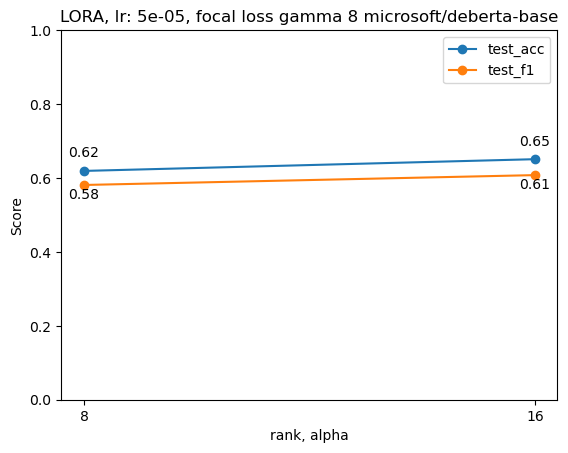

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'LORA, lr: {lr}, focal loss gamma {g} {model_checkpoint}',
                        column='rank, alpha',
                        sci_format=False)

In [6]:
%reset -f